# Project D10: KAGGLE - Movie Ratings

Authors:
- Kevin Kliimask
- Jens Jäger
- Taavi Eistre

<font color='red'>TODO: Write introductive text</font>

## Importing the data

We will start off with importing all the necessary packages and the data.
After looking at the data manually, we saw that 6 rows were 'broken' so to say with a lot of misaligned columns, so we decided to skip them.
We will be using the selected columns from the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
%matplotlib inline

data = pd.read_csv('movies_metadata.csv', skiprows=[19730, 19731, 29503, 29504, 35587, 35588],
                   usecols=['id', 'original_title', 'original_language', 'genres', 'production_companies',
                            'production_countries', 'runtime', 'vote_average'])

## Preprocessing the data

First off we'll remove all the duplicate rows (movies) and then lose the **'id'** column as we don't have a need for it.

In [2]:
print(f'The number of movies before removing the duplicates: {len(data)}')
data = data.drop_duplicates(subset='id', ignore_index=True)

data = data.drop(columns=['id'])
print(f'The number of movies after removing the duplicates: {len(data)}')

data.head()

The number of movies before removing the duplicates: 45460
The number of movies after removing the duplicates: 45430


,genres,original_language,original_title,production_companies,production_countries,runtime,vote_average
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,7.7
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,6.9
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,6.5
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,6.1
4,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,5.7


Next off we will be converting the **JSON** formats of columns **'genres'**, **'production_companies'** and **'production_countries'** to a list format using the help of `ast.literal_eval()`,
which helps to parse the columns' objects into the desired type.

In [3]:
data['genres'] = data['genres'].apply(lambda genres_list: [genres['name'] for genres in ast.literal_eval(genres_list)])

data['production_companies'] = data['production_companies'].apply(lambda companies_list: [companies['name'] for companies in ast.literal_eval(companies_list)])

data['production_countries'] = data['production_countries'].apply(lambda countries_list: [countries['name'] for countries in ast.literal_eval(countries_list)])

data.head()

,genres,original_language,original_title,production_companies,production_countries,runtime,vote_average
0,"[Animation, Comedy, Family]",en,Toy Story,[Pixar Animation Studios],[United States of America],81.0,7.7
1,"[Adventure, Fantasy, Family]",en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,6.9
2,"[Romance, Comedy]",en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,6.5
3,"[Comedy, Drama, Romance]",en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],127.0,6.1
4,[Comedy],en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,5.7


Next we will remove all the movies that have:
- No genres
- No production companies
- No production countries
- 0 runtime
- NaN values

In [4]:
print(f'The number of movies before removing all of the mentioned movies above: {len(data)}')

data = data.dropna()
data = data[(data.runtime > 0) & (data.genres.str.len() > 0) & (data.production_companies.str.len() > 0) & (data.production_countries.str.len() > 0)]

print(f'The number of movies after removing all of the mentioned movies above: {len(data)}')

The number of movies before removing all of the mentioned movies above: 45430
The number of movies after removing all of the mentioned movies above: 32205


Finding the **total number** and **frequency** of genres, companies and countries.

In [5]:
genres_dict = {}
companies_dict = {}
countries_dict = {}

for index, row in data.iterrows():
    for genre in row['genres']:
        genres_dict[genre] = genres_dict.get(genre, 0) + 1

    for company in row['production_companies']:
        companies_dict[company] = companies_dict.get(company, 0) + 1

    for country in row['production_countries']:
        countries_dict[country] = countries_dict.get(country, 0) + 1

In [6]:
print(f'The number of genres: {len(genres_dict)}')
print(f'The number of production companies: {len(companies_dict)}')
print(f'The number of production countries: {len(countries_dict)}')

The number of genres: 20
The number of production companies: 22922
The number of production countries: 153


After seeing that there are **too many** production companies, we will filter out the top 100.

In [7]:
top_companies = [company for company, freq in sorted(companies_dict.items(), key=lambda x:x[1], reverse=True)[:100]]

Next, we will update the **'production_companies'** column and remove all the left out production companies.
Then, movies without production companies will be filtered out.

In [8]:
print(f'The number of movies before filtering production companies: {len(data)}')

data['production_companies'] = data['production_companies'].apply(lambda companies_list: [company for company in companies_list if company in top_companies])

data = data[data.production_companies.str.len() > 0]

print(f'The number of movies after filtering production companies: {len(data)}')

The number of movies before filtering production companies: 32205
The number of movies after filtering production companies: 12181


## Exploring our data

Now that we have cleaned the data, let's have a look at what interesting we can find from what remains.

We will start with counting the **frequencies** of **genres**, **production companies** and **production countries** again.

In [9]:
genres_dict = {}
companies_dict = {}
countries_dict = {}

for index, row in data.iterrows():
    for genre in row['genres']:
        genres_dict[genre] = genres_dict.get(genre, 0) + 1

    for company in row['production_companies']:
        companies_dict[company] = companies_dict.get(company, 0) + 1

    for country in row['production_countries']:
        countries_dict[country] = countries_dict.get(country, 0) + 1

In [10]:
data.head()

,genres,original_language,original_title,production_companies,production_countries,runtime,vote_average
0,"[Animation, Comedy, Family]",en,Toy Story,[Pixar Animation Studios],[United States of America],81.0,7.7
1,"[Adventure, Fantasy, Family]",en,Jumanji,[TriStar Pictures],[United States of America],104.0,6.9
2,"[Romance, Comedy]",en,Grumpier Old Men,[Warner Bros.],[United States of America],101.0,6.5
3,"[Comedy, Drama, Romance]",en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],127.0,6.1
4,[Comedy],en,Father of the Bride Part II,[Touchstone Pictures],[United States of America],106.0,5.7


Firstly, we'll look at the top 25 highest rated movies.

In [11]:
print(f'The number of remaining movies with a rating of 10: {len(data[data.vote_average == 10])}')
data.sort_values(by=['vote_average', 'original_title'], ascending=False).head(25)[['original_title', 'vote_average']]

The number of remaining movies with a rating of 10: 20


,original_title,vote_average
43984,ああ爆弾,10.0
25546,The Walking Stick,10.0
27275,The Little Hut,10.0
39729,Sunnyside Up,10.0
11663,Something in the Wind,10.0
38031,One Man's Journey,10.0
10453,Li'l Abner,10.0
25138,Let No Man Write My Epitaph,10.0
15377,Kaze no naka no kodomo,10.0
30118,Im Alter von Ellen,10.0


Next, we will see the **frequency** histogram of the original languages of movies.

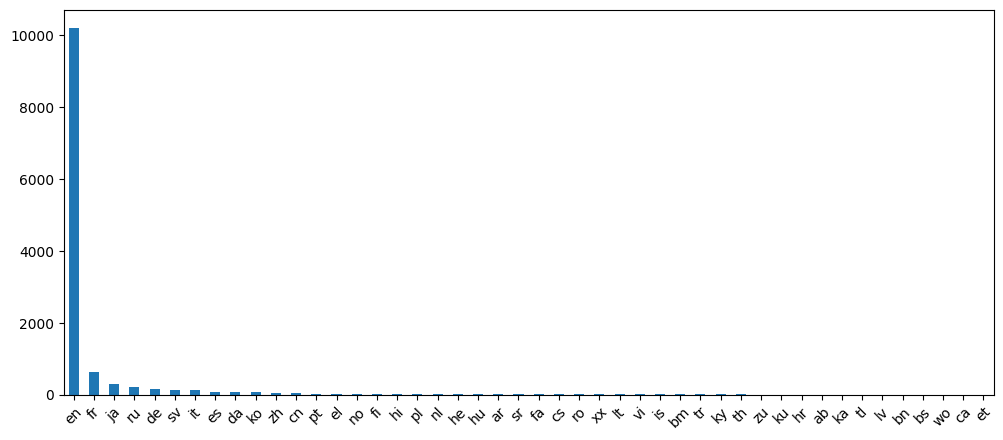

In [12]:
language_freq = data['original_language'].value_counts()
language_freq.plot(kind='bar', figsize=(12, 5), rot=45)
plt.show()

Next up, runtime **frequency** histogram.

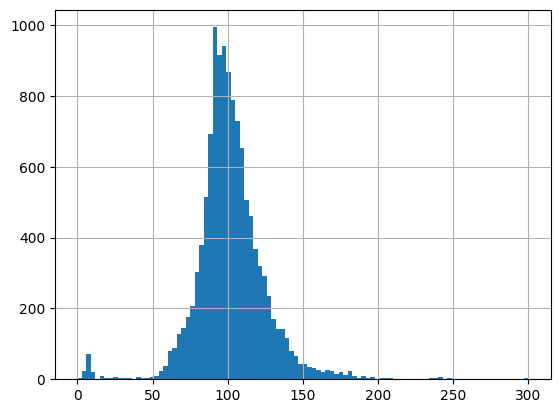

In [13]:
plot = data['runtime'].hist(bins=100, range=[0, 300])
plt.show()

Now, let's see the **relative frequency** histogram of genres.

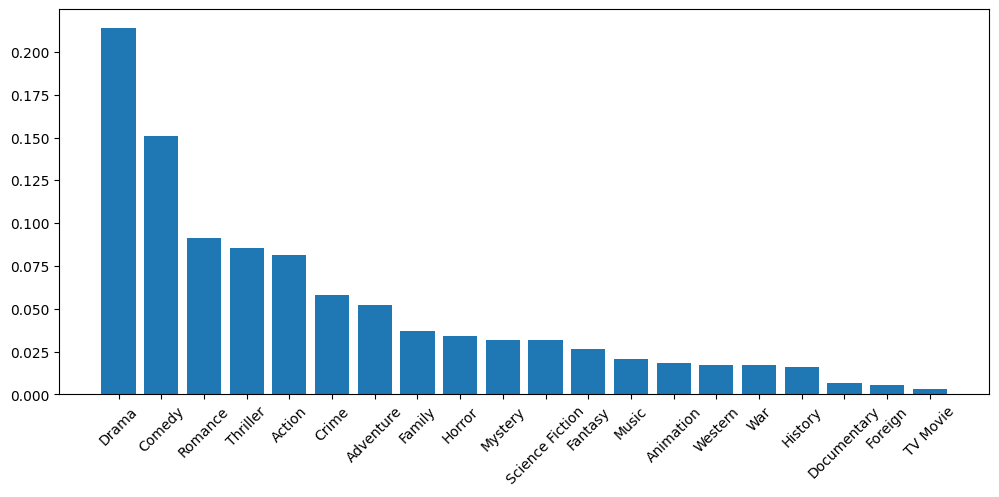

In [14]:
genres_dict = dict(sorted(genres_dict.items(), key=lambda x: x[1], reverse=True))
total_number = 0
for freq in genres_dict.values():
    total_number += freq

plt.figure(figsize=(12, 5))
plt.bar(range(len(genres_dict)), [freq / total_number for freq in genres_dict.values()], align='center')
plt.xticks(range(len(genres_dict)), list(genres_dict.keys()), rotation=45)

plt.show()

The **relative frequency** histogram of the top 25 production companies.

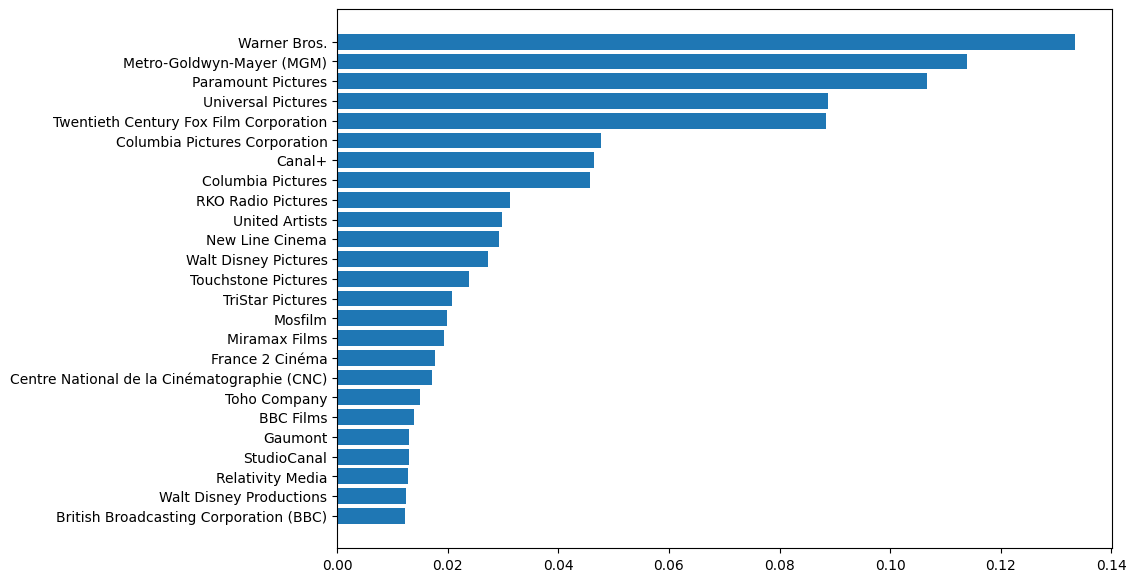

In [15]:
companies_dict = dict(sorted(companies_dict.items(), key=lambda x: x[1], reverse=True)[:25])
total_number = 0
for freq in companies_dict.values():
    total_number += freq

plt.figure(figsize=(10, 7))
plt.barh(list(companies_dict.keys()), [freq / total_number for freq in companies_dict.values()], align='center', orientation='horizontal')
plt.gca().invert_yaxis()

plt.show()

And finally, the **relative frequency** histogram of the top 25 production countries.

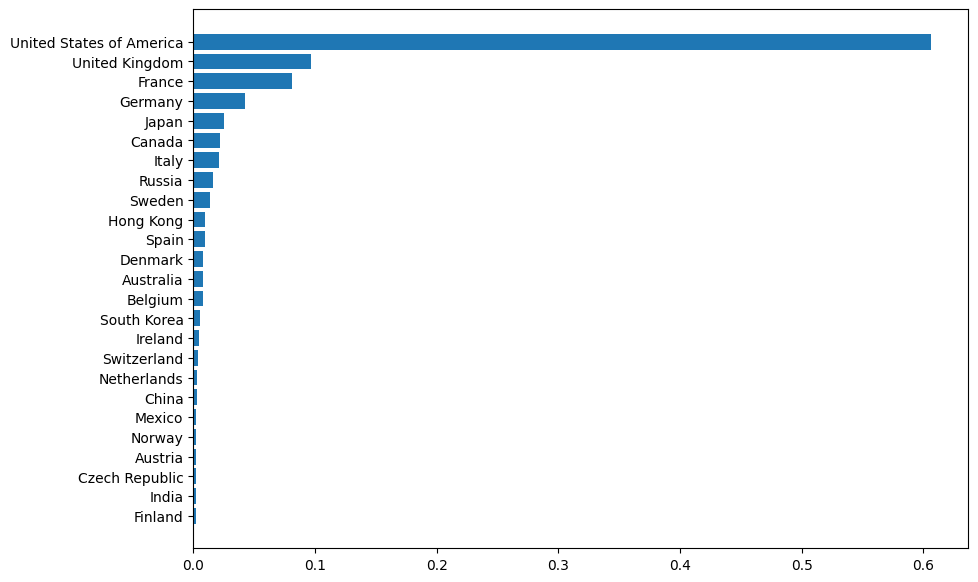

In [16]:
countries_dict = dict(sorted(countries_dict.items(), key=lambda x: x[1], reverse=True)[:25])
total_number = 0
for freq in countries_dict.values():
    total_number += freq

plt.figure(figsize=(10, 7))
plt.barh( list(countries_dict.keys()), [freq / total_number for freq in countries_dict.values()], align='center')
plt.gca().invert_yaxis()

plt.show()

## Starting with the model